### k-nn 알고리즘
##### 참고 자료 : https://www.kaggle.com/code/bonsmots/2d-knn-with-iris


In [1]:
# 필요한 라이브러리 임포트
import numpy as np # 기본 numpy를 임포트합니다.
from matplotlib import pyplot as plt # 그래프 그리기 위한 pyplot을 가져옵니다.
import matplotlib.patches as mpatches # 그래프의 범례 처리를 위해 임포트합니다.
from sklearn.datasets import load_iris # scikit-learn에서 제공하는 iris 데이터셋을 불러옵니다.
from sklearn.neighbors import KNeighborsClassifier # scikit-learn의 KNN 분류기를 사용하기 위해 임포트합니다.


In [2]:
# 1차원 배열에 대한 numpy의 모드 계산은 조금 복잡하므로 편의를 위해 람다 함수를 정의합니다.
mode = lambda x: np.argmax(np.bincount(x.astype(int)))

# 차트를 위한 유틸리티 함수; 이 함수는 다른 데이터 포인트의 종류에 해당하는 색상의 목록을 생성합니다.
def int_to_colour(d):
    colours = []
    for x in d:
        if x == 0: colours.append('red')
        if x == 1: colours.append('green')
        if x == 2: colours.append('blue')
    return colours


In [3]:
# 데이터셋을 불러옵니다.
iris = load_iris()

# 사용 가능한 데이터를 살펴봅니다.
print(iris.data.shape)       # 데이터의 형태를 출력합니다.
print(iris.feature_names)   # 특성의 이름을 출력합니다.
print(iris.data[:5])        # 처음 5개의 데이터 포인트를 출력합니다.


(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


C:\Users\nonel\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nonel\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nonel\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nonel\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nonel\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) 

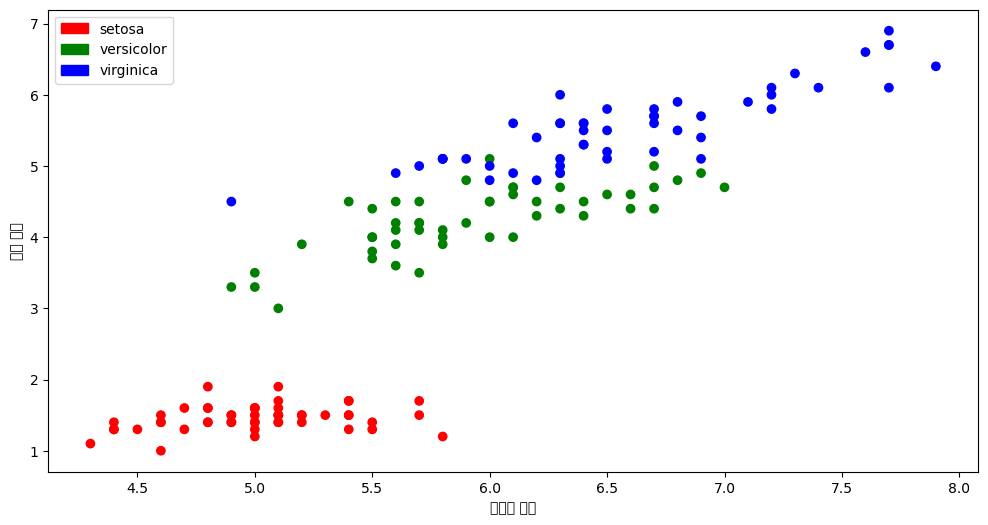

In [4]:
# 꽃받침과 꽃잎의 길이에 관련된 열 벡터만을 사용하여 차원을 네 개에서 두 개로 줄입니다.
sepal_length = iris.data[:,0]    # 꽃받침의 길이
petal_length = iris.data[:,2]    # 꽃잎의 길이
species = iris.target            # 꽃의 종류

# 차트를 위한 색상 설정
colours = int_to_colour(species)

# 아래 코드는 차트의 범례를 설정합니다.
patches = [mpatches.Patch(color=int_to_colour([x])[0], label=iris.target_names[x]) for x in range(3)]

# 꽃받침과 꽃잎의 길이에 관한 플롯을 생성합니다.
plt.figure(figsize=(12,6))
plt.legend(handles=patches)     # 범례 추가
plt.xlabel('꽃받침 길이')          # x축 라벨 설정
plt.ylabel('꽃잎 길이')           # y축 라벨 설정
plt.scatter(sepal_length, petal_length, color=colours)  # 산점도 그리기
plt.show()                       # 그래프 출력


In [5]:
# scikit-learn이 선호하는 방식으로 데이터를 패키징하여 새로운 numpy 배열을 생성합니다.
X = np.c_[sepal_length, petal_length]   # 두 특성 차원을 포함하는 배열
y = species                            # 타겟 데이터

# 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5)  # KNN 분류기 생성 (이웃 수: 5)
knn.fit(X[:120], y[:120])                 # 처음 120개의 데이터로 분류기를 훈련시킵니다.


KNeighborsClassifier()

In [6]:
# 예측
x_p1 = np.array([[0,0]])  # 새로운 데이터 포인트 1
y_hat = knn.predict(x_p1)  # 분류기로 예측
print(iris.target_names[y_hat])  # 예측된 붓꽃의 종류를 출력

x_p2 = np.array([[6,4]])  # 새로운 데이터 포인트 2
y_hat = knn.predict(x_p2)  # 분류기로 예측
print(iris.target_names[y_hat])  # 예측된 붓꽃의 종류를 출력

x_p3 = np.array([[8,6.5]])  # 새로운 데이터 포인트 3
y_hat = knn.predict(x_p3)  # 분류기로 예측
print(iris.target_names[y_hat])  # 예측된 붓꽃의 종류를 출력


['setosa']
['versicolor']
['virginica']


In [7]:
# 훈련 데이터 이후의 데이터에 대한 예측
y_hats = knn.predict(X[120:])  # 훈련 데이터 이후의 모든 데이터에 대한 예측
print(iris.target_names[y_hats])  # 예측된 모든 붓꽃의 종류를 출력


['virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica']


In [8]:
# 정확도 계산
correct = sum([(i[0] == i[1]) for i in zip(y_hats, y[120:])])  # 예측값과 실제값이 같은 경우의 수를 합산합니다.
pct_correct = correct / len(y_hats) * 100  # 정확도를 백분율로 계산합니다.
print("{}개가 정확하게 예측되었으며, 이는 전체의 {:.0f}%를 차지합니다.".format(correct, pct_correct))  # 정확도 및 백분율을 출력합니다.


24개가 정확하게 예측되었으며, 이는 전체의 80%를 차지합니다.


In [9]:
# 랭크 예제를 위해 argsort를 두 번 사용합니다.
my_npa = np.array([3,1,2])
sort_indices = np.argsort(my_npa)  # 배열의 인덱스를 정렬합니다.
sort_rank = np.argsort(sort_indices)  # 정렬된 인덱스를 다시 정렬하여 랭크를 얻습니다.
print(my_npa)  # 원래 배열을 출력합니다.
print(sort_indices)  # 인덱스 정렬 결과를 출력합니다.
print(sort_rank + 1)  # 랭크는 0부터 시작되므로, 1을 더해 1부터 시작하도록 합니다.

# 결론: numpy에서 랭크를 구하려면 argsort를 두 번 사용하고, 랭크가 0에서 시작하는 것이 아닌 경우 결과에 1을 추가합니다.


[3 1 2]
[1 2 0]
[3 1 2]


In [10]:
# 두 차원에서의 유클리디안 거리 계산
def euc_dist_2d(x_p, X, y):
    deltas = X - x_p  # 행렬 뺄셈, deltas는 차이의 행렬입니다.
    euc_dists = np.sum(deltas ** 2, axis=1) ** 0.5  # 행(즉, 2차원)을 기준으로 제곱된 deltas의 합을 계산하고, 이 합들의 제곱근을 구합니다.
    a_sort = np.argsort(euc_dists)  # 랭크를 위해 argsort를 두 번 사용합니다.
    ranks = np.argsort(a_sort)

    # 다음을 포함하는 행렬을 반환합니다:
    # ranks, 유클리디안 거리, X, 클래스
    
    # np.c_[...]는 열 벡터를 행렬로 이어붙입니다. 이를 반환합니다.
    return np.c_[ranks, euc_dists, X, y]

# 2차원용 KNN 함수
# y_hat을 반환합니다.
def knn_2d(x_p, X, y, k):
    if k < 2:
        print('n은 1보다 커야 합니다.')  # k의 최소값은 1입니다.
        return
    
    distance_info = euc_dist_2d(x_p, X, y)  # x_p에서 모든 다른 점까지의 유클리디안 거리 행렬

    # 1순위 랭크, 즉 가장 가까운 이웃 가져오기
    for i in range(len(distance_info)):
        if int(distance_info[i][0]) == 0:  # 랭크 0인지 확인
            knns = distance_info[i]  # 맞다면, knns 행렬을 여기서 시작합니다.
        
    # 그 이후로 2순위부터 k순위까지 추가하기
    if k > 1:
        for r in range(2, k + 1):
            for i in range(len(distance_info)):
                if int(distance_info[i][0]) == (r-1):  # 랭크 r-1인지 확인
                    knns = np.vstack((knns, distance_info[i]))  # 맞다면, knns 행렬에 행 벡터를 추가합니다.

    return knns[:, 4]  # 결과 클래스만 반환합니다.


In [11]:
# 첫 번째 데이터 포인트에 대한 KNN 예측
result = knn_2d(x_p1, X[:120], y[:120], 5)  # 처음 120개의 데이터로 KNN 예측
print(iris.target_names[mode(result)])  # 예측 결과의 최빈값을 사용하여 붓꽃의 이름을 출력

# 두 번째 데이터 포인트에 대한 KNN 예측
result = knn_2d(x_p2, X[:120], y[:120], 5)  # 처음 120개의 데이터로 KNN 예측
print(iris.target_names[mode(result)])  # 예측 결과의 최빈값을 사용하여 붓꽃의 이름을 출력

# 세 번째 데이터 포인트에 대한 KNN 예측
result = knn_2d(x_p3, X[:120], y[:120], 5)  # 처음 120개의 데이터로 KNN 예측
print(iris.target_names[mode(result)])  # 예측 결과의 최빈값을 사용하여 붓꽃의 이름을 출력


setosa
versicolor
virginica


In [12]:
# 각 데이터 포인트에 대한 KNN 예측을 수행하고 결과의 최빈값을 저장합니다.
y_hats = [mode(knn_2d(x_p, X[:120], y[:120], 5)) for x_p in X[120:]]
print(iris.target_names[y_hats])  # 예측 결과의 최빈값을 사용하여 모든 데이터 포인트의 붓꽃 이름을 출력


['virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica']


In [13]:
# 정확도 계산
correct = sum([(i[0] == i[1]) for i in zip(y_hats, y[120:])])  # 예측과 실제 값이 일치하는 경우의 수를 합산합니다.
pct_correct = correct / len(y_hats) * 100  # 정확도를 백분율로 계산합니다.
print("{}개가 정확하게 예측되었으며, 이는 전체의 {:.0f}%를 차지합니다.".format(correct, pct_correct))  # 정확도 및 백분율을 출력합니다.


24개가 정확하게 예측되었으며, 이는 전체의 80%를 차지합니다.
